# Assuming we have labels

importing libraries

In [1]:
import numpy as np; np.set_printoptions(suppress=True, threshold=6, precision=3)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

Importing utility functions and datasets

In [2]:
from import_dataset import *
from plot_tools import *

## Evaluation metrics

We have two set of labels; emotion and sex. Emotion labels have 4 classes and sex labels have 2 classes. It is reasonable to think when we are clustering dataset into 2 and 4 clusters our resulting labels should be somewhat close to our original labels in the case of sex and emotion respectively.

Everything sounds good but the fact that clustering algorithms assign labels to data points randomly, meaning they do not follow sequencing orders in our original label sets due to the fact that these algorithms won't accept our original labels in their input and they are not aware of original labeling or their sequencing order.

On order to overcome this issue we have to use a metric that ignores permutations in comparing labels. One of the famous ones is **rand score**. Rand index computes a similarity measure between two clusterings by considering all pairs that the assigned in the same or different clusters in the predicted and true clusterings

## Dataset 1

### Feature Selection

We are going to use LDA as our dimension reduction algorithm.

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


lda1_emo = LDA(n_components=3)
data1_lda_emo = lda1_emo.fit_transform(data1, emotion_data1)

lda1_sex = LDA(n_components=1)
data1_lda_sex = lda1_sex.fit_transform(data1, sex_data1)

Plotting 1 dimensional data corresponding to LDA result with sex labels

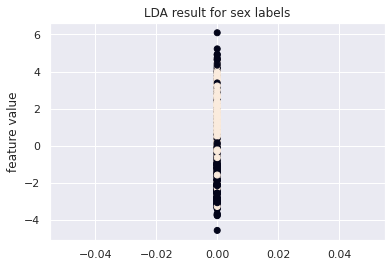

In [32]:
plt.scatter(np.zeros(data1.shape[0]), data1_lda_sex[:, 0], c=sex_data1)
plt.ylabel("feature value")
plt.title("LDA result for sex labels")
plt.show()

Plotting 3 dimensional data corresponding to LDA result with emotion labels

[INFO] plotting 4 classes.


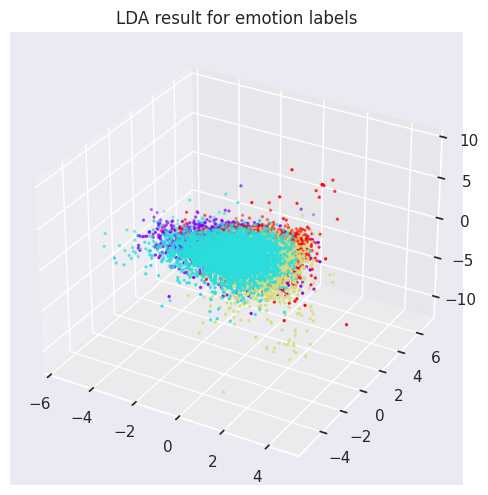

In [33]:
plot_3d(data1_lda_emo, label=emotion_data1, title="LDA result for emotion labels")

### 2 Clusters

#### GMM

In [42]:
from sklearn.mixture import GaussianMixture

gmm1_2 = GaussianMixture(n_components=2)

y_pred_gmm1_2 = gmm1_2.fit_predict(data1_lda_sex)

In [44]:
from sklearn.metrics import rand_score

print(f"rand score (GMM, n=2): {rand_score(sex_data1, y_pred_gmm1_2):0.4f}")

rand score (GMM, n=2): 0.6023


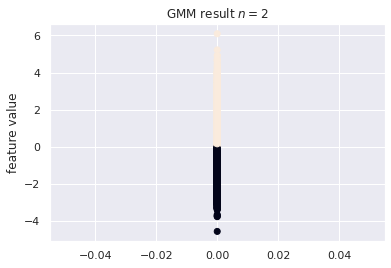

In [45]:
plt.scatter(np.zeros(data1.shape[0]), data1_lda_sex[:, 0], c=y_pred_gmm1_2)
plt.ylabel("feature value")
plt.title("GMM result $n = 2$")
plt.show()

#### KMeans

In [46]:
from sklearn.cluster import KMeans

km1_2 = KMeans(n_clusters=2)
y_pred_km1_2 = km1_2.fit_predict(data1_lda_sex)

In [47]:
print(f"rand score (KMeans, n=2): {rand_score(sex_data1, y_pred_km1_2):0.4f}")

rand score (KMeans, n=2): 0.6028


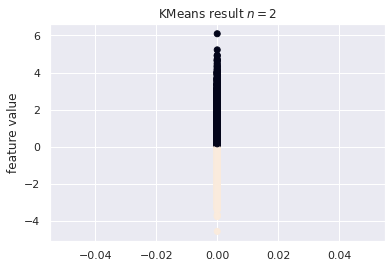

In [49]:
plt.scatter(np.zeros(data1.shape[0]), data1_lda_sex[:, 0], c=y_pred_km1_2)
plt.ylabel("feature value")
plt.title("KMeans result $n = 2$")
plt.show()

#### Analysis

In the case of 2 clusters KMeans and GMM performed similarly. Both has around 0.6 rand score which is moderate, but expected.

### 4 Clusters

#### GMM

In [50]:
gmm1_4 = GaussianMixture(n_components=4)

y_pred_gmm1_4 = gmm1_4.fit_predict(data1_lda_emo)

In [51]:
print(f"rand score (GMM, n=4): {rand_score(emotion_data1, y_pred_gmm1_4):0.4f}")

rand score (GMM, n=4): 0.6138


[INFO] plotting 4 classes.


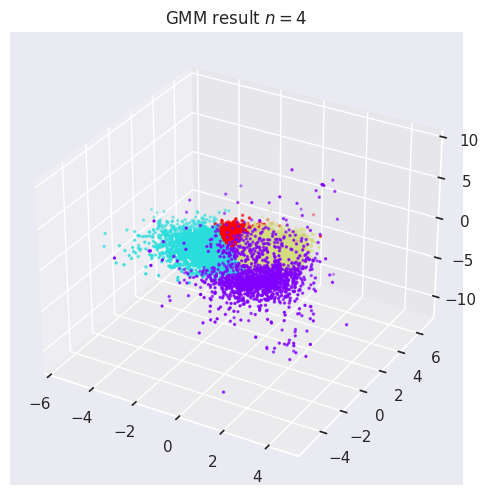

In [8]:
plot_3d(data1_lda_emo, label=y_pred_gmm1_4, title="GMM result $n = 4$")

#### KMeans

In [52]:
km1_4 = KMeans(n_clusters=4)
y_pred_km1_4 = km1_4.fit_predict(data1_lda_emo)

In [54]:
print(f"rand score (KMeans, n=4): {rand_score(emotion_data1, y_pred_km1_4):0.4f}")

rand score (KMeans, n=4): 0.6481


[INFO] plotting 4 classes.


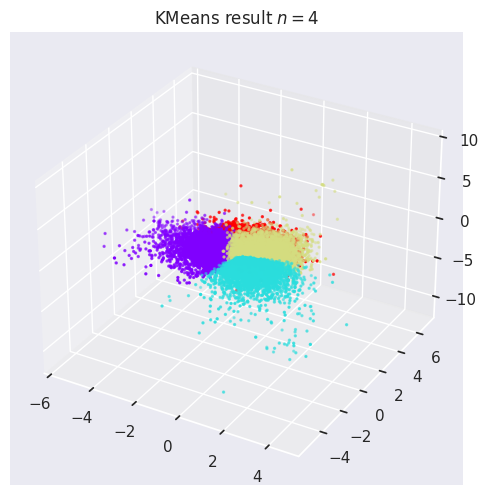

In [53]:
plot_3d(data1_lda_emo, label=y_pred_km1_4, title="KMeans result $n = 4$")

#### Analysis

In this case we have compared clustering results to emotion labels. Using GMM we got around 0.61 rand score and with KMeans we got around 0.65 rand score. Considering complexity of the problem and number of classes, we can say both algorithms performed well.

### 10 Clusters

#### GMM

In [56]:
gmm1_10 = GaussianMixture(n_components=10)

y_pred_gmm1_10 = gmm1_10.fit_predict(data1_lda_emo)

[INFO] plotting 10 classes.


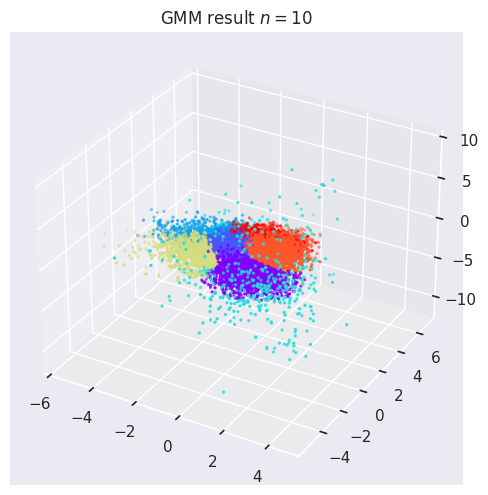

In [58]:
plot_3d(data1_lda_emo, label=y_pred_gmm1_10, title="GMM result $n = 10$")

#### KMeans

In [59]:
km1_10 = KMeans(n_clusters=10)
y_pred_km1_10 = km1_10.fit_predict(data1_lda_emo)

[INFO] plotting 10 classes.


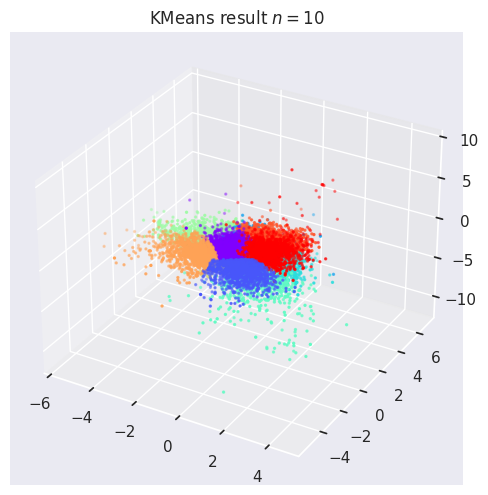

In [60]:
plot_3d(data1_lda_emo, label=y_pred_km1_10, title="KMeans result $n = 10$")

#### Analysis

In this case, results are the same for both algorithms and everything is as expected

### $p$ Clusters

In [62]:
p = data1.shape[0]//160

#### GMM

In [63]:
gmm1_p = GaussianMixture(n_components=p)

y_pred_gmm1_p = gmm1_p.fit_predict(data1_lda_emo)

[INFO] plotting 104 classes.


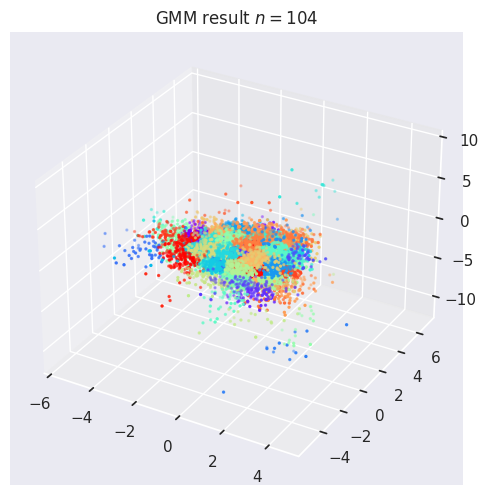

In [64]:
plot_3d(data1_lda_emo, label=y_pred_gmm1_p, title=f"GMM result $n = {p}$")

#### KMeans

In [65]:
km1_p = KMeans(n_clusters=p)
y_pred_km1_p = km1_p.fit_predict(data1_lda_emo)

[INFO] plotting 104 classes.


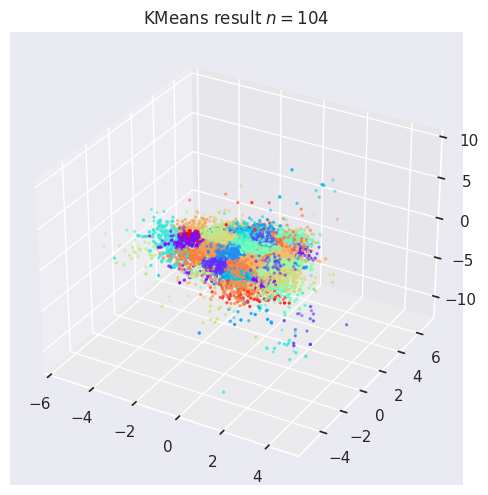

In [66]:
plot_3d(data1_lda_emo, label=y_pred_km1_p, title=f"KMeans result $n = {p}$")